# Problem Statement #2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/Dell/Desktop/Assignments/Multi Linear Regression/ToyotaCorolla.csv', encoding='unicode_escape')

In [3]:
df = data.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'],axis=1)

In [4]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [5]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [6]:
df.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [7]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


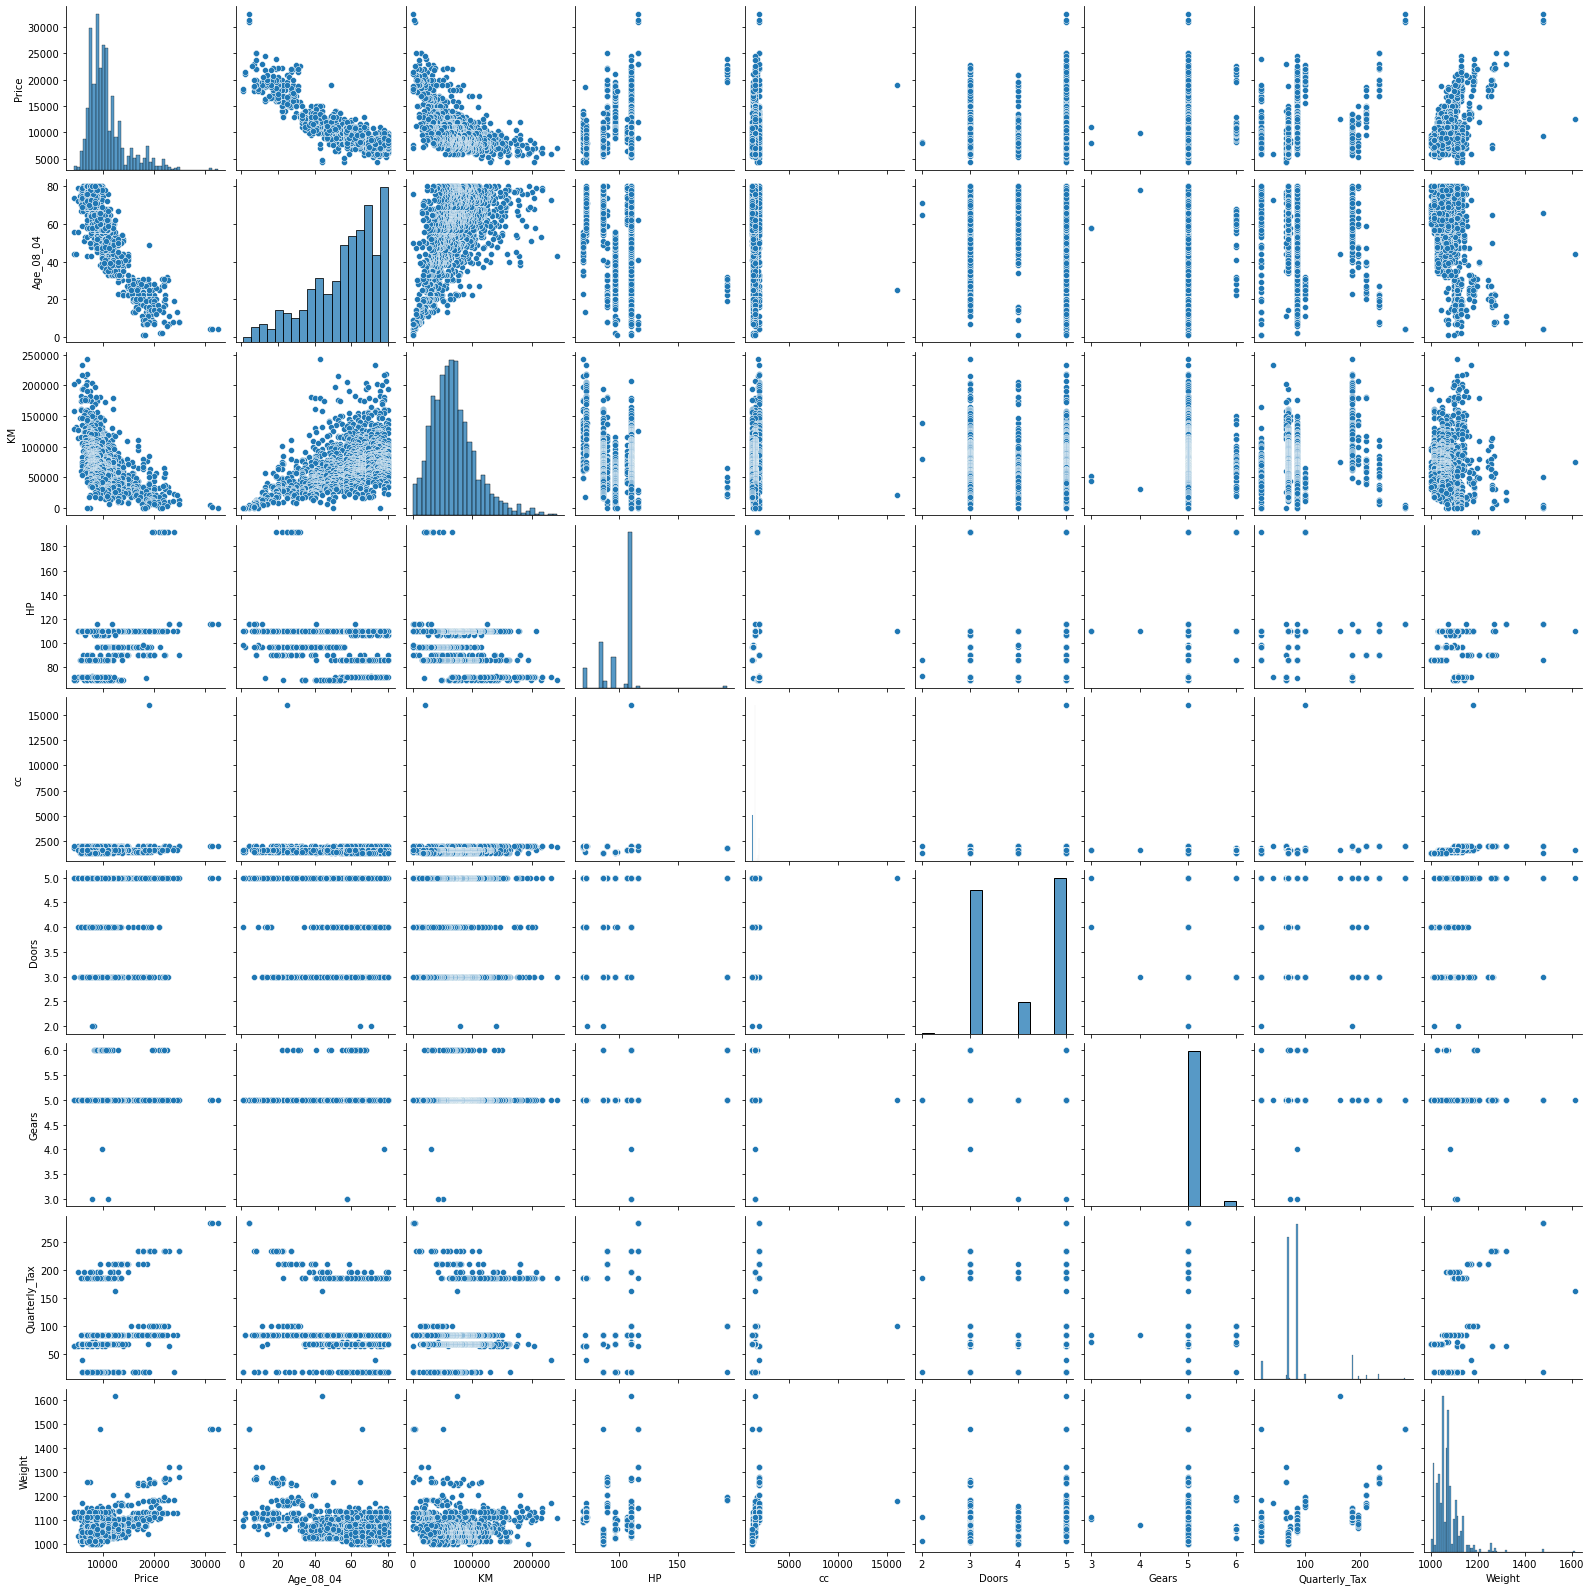

In [8]:
sns.pairplot(df)

# Model Building

In [9]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:16:38   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
model.rsquared

0.8637627463428192

In [12]:
model.rsquared_adj

0.8629989775766963

In [13]:
model.pvalues, '\n', model.tvalues

(Intercept         8.241949e-05
 Age_08_04        3.354724e-288
 KM                7.538439e-57
 HP                3.757218e-28
 cc                1.790902e-01
 Doors             9.677716e-01
 Gears             2.606549e-03
 Quarterly_Tax     2.619148e-03
 Weight            2.048576e-52
 dtype: float64,
 '\n',
 Intercept        -3.948666
 Age_08_04       -46.511852
 KM              -16.621622
 HP               11.241018
 cc               -1.344222
 Doors            -0.040410
 Gears             3.016007
 Quarterly_Tax     3.014535
 Weight           15.879803
 dtype: float64)

# Simple Liner Regression Models

In [14]:
m_age = smf.ols('Price~Age_08_04', data = df).fit()
m_KM = smf.ols('Price~KM', data = df).fit()
m_HP = smf.ols('Price~HP', data = df).fit()
m_cc = smf.ols('Price~cc', data = df).fit()
m_Doors = smf.ols('Price~Doors', data = df).fit()
m_Gears = smf.ols('Price~Gears', data = df).fit()
m_Quarterly_Tax = smf.ols('Price~Quarterly_Tax', data = df).fit()
m_Weight = smf.ols('Price~Weight', data = df).fit()

In [15]:
m_age.pvalues, m_KM.pvalues, m_HP.pvalues, m_cc.pvalues, m_Doors.pvalues, m_Gears.pvalues, m_Quarterly_Tax.pvalues,m_Weight.pvalues

(Intercept    0.0
 Age_08_04    0.0
 dtype: float64,
 Intercept     0.000000e+00
 KM           1.757913e-124
 dtype: float64,
 Intercept    1.725695e-06
 HP           1.926234e-34
 dtype: float64,
 Intercept    1.766912e-112
 cc            1.550808e-06
 dtype: float64,
 Intercept    1.094732e-73
 Doors        1.461237e-12
 dtype: float64,
 Intercept    0.069804
 Gears        0.016775
 dtype: float64,
 Intercept        1.532168e-246
 Quarterly_Tax     4.407393e-17
 dtype: float64,
 Intercept     1.739508e-80
 Weight       1.630487e-130
 dtype: float64)

# VIF Calculation

In [16]:
rsq_age = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = df).fit().rsquared
rsq_KM = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = df).fit().rsquared
rsq_HP = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight', data = df).fit().rsquared
rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight', data = df).fit().rsquared
rsq_Doors = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight', data = df).fit().rsquared
rsq_Gears = smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight', data = df).fit().rsquared
rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight', data = df).fit().rsquared
rsq_Weight = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax', data = df).fit().rsquared
vif_age = 1/(1-rsq_age)
vif_KM = 1/(1-rsq_KM)
vif_HP = 1/(1-rsq_HP)
vif_cc = 1/(1-rsq_cc)
vif_Doors = 1/(1-rsq_Doors)
vif_Gears = 1/(1-rsq_Gears)
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax)
vif_Weight = 1/(1-rsq_Weight)

In [17]:
df1 = {'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
vif_frame = pd.DataFrame(df1)
vif_frame

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


<ipython-input-18-7996a1c4387a>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  qqplot.show()


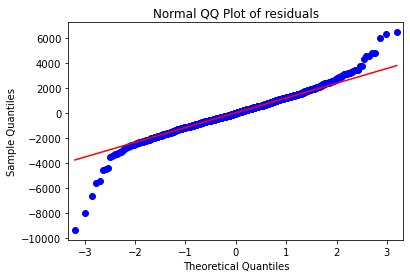

In [18]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q')
plt.title('Normal QQ Plot of residuals')
qqplot.show()

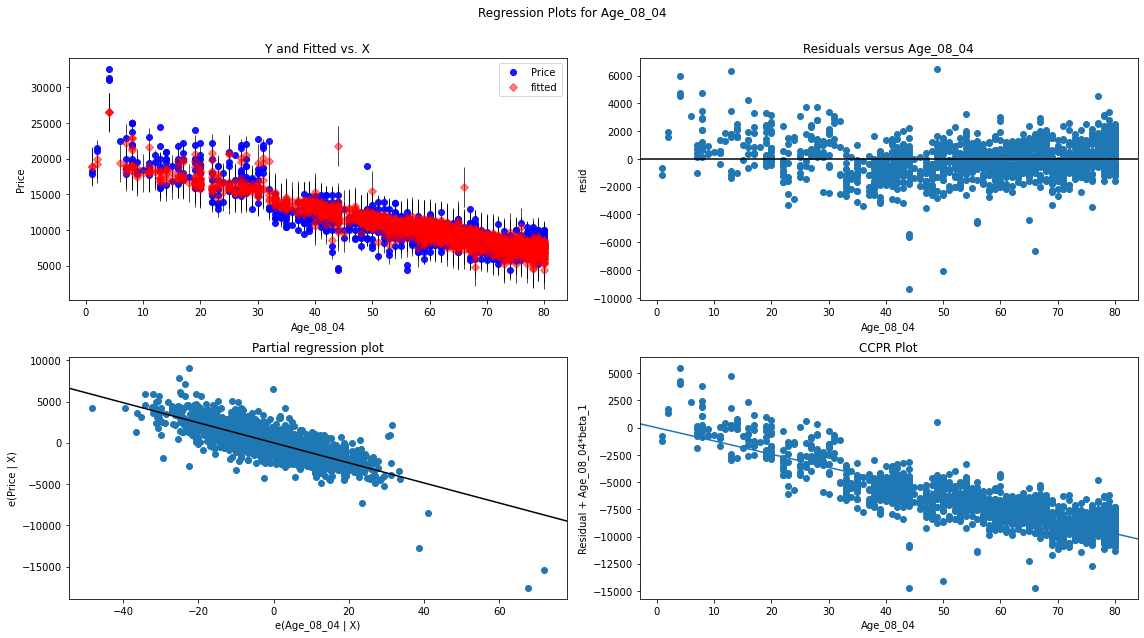

In [19]:
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"Age_08_04",fig=fig)
plt.show()

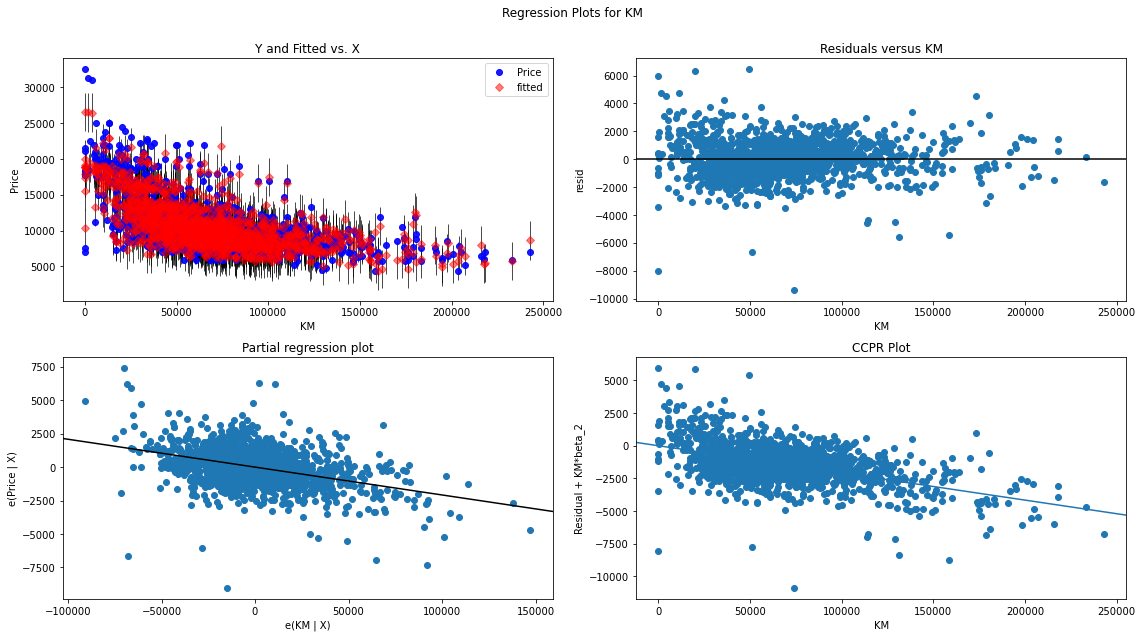

In [20]:
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

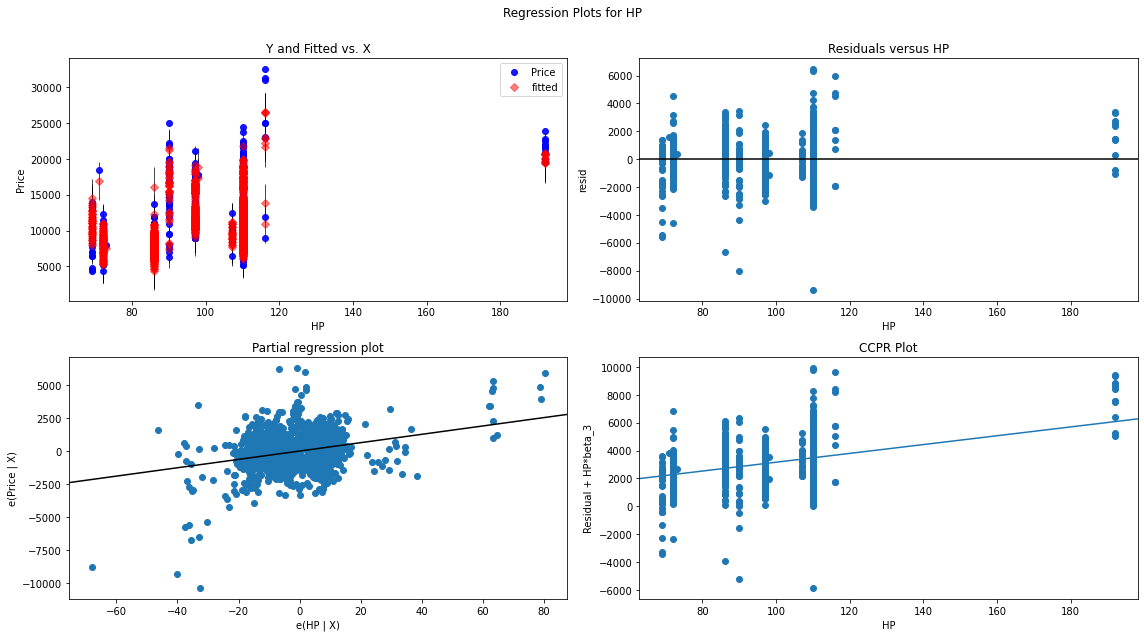

In [21]:
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

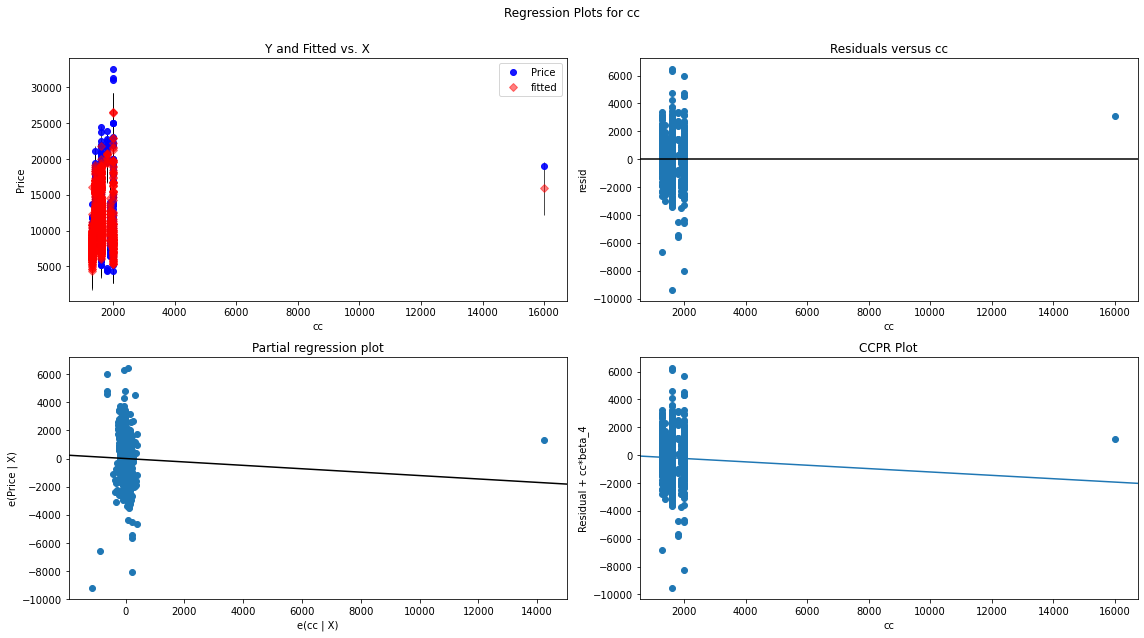

In [22]:
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"cc",fig=fig)
plt.show()

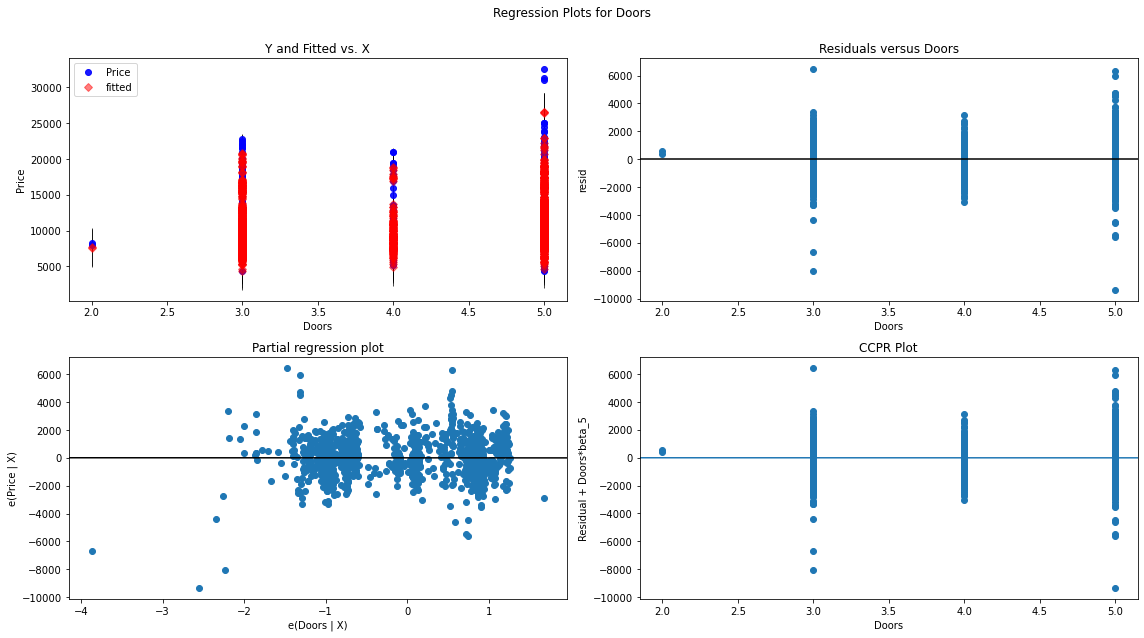

In [23]:
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

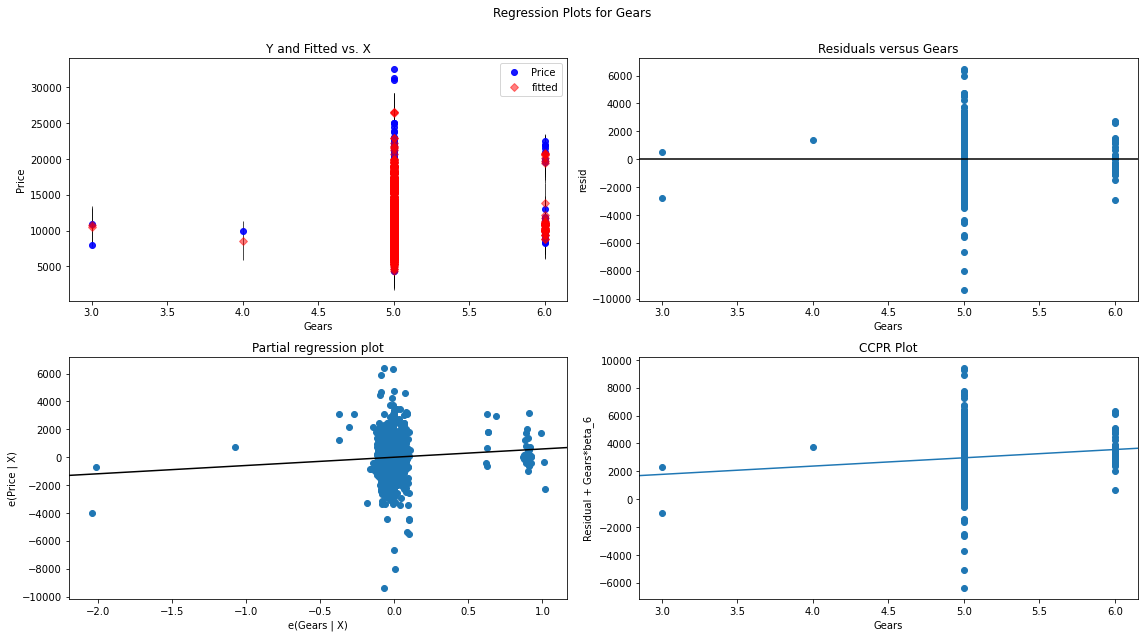

In [24]:
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()

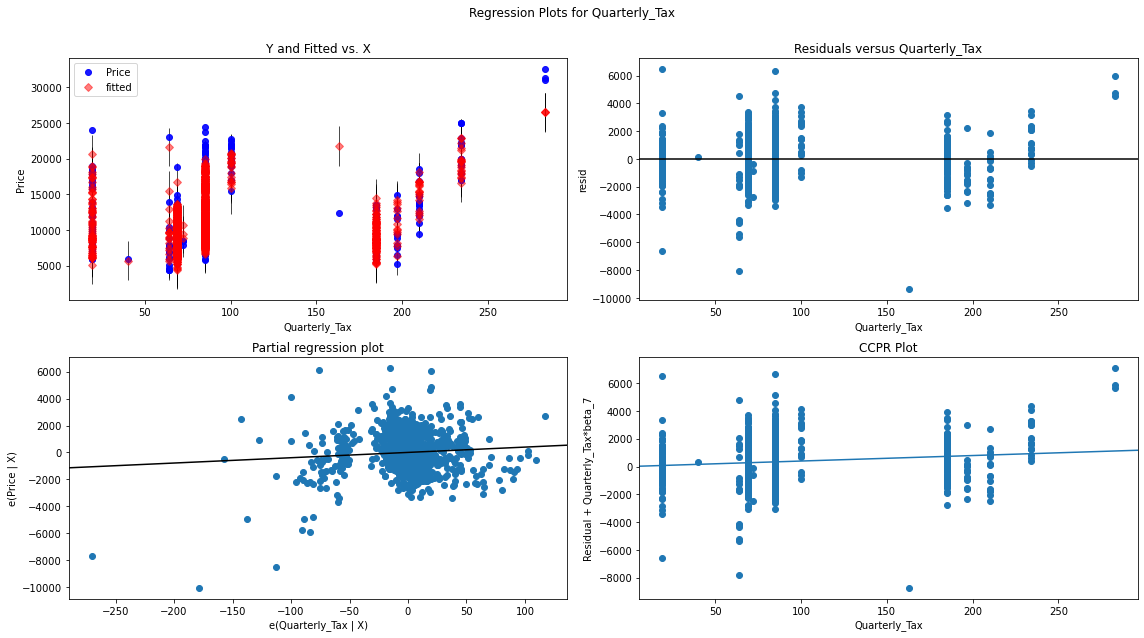

In [25]:
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"Quarterly_Tax",fig=fig)
plt.show()

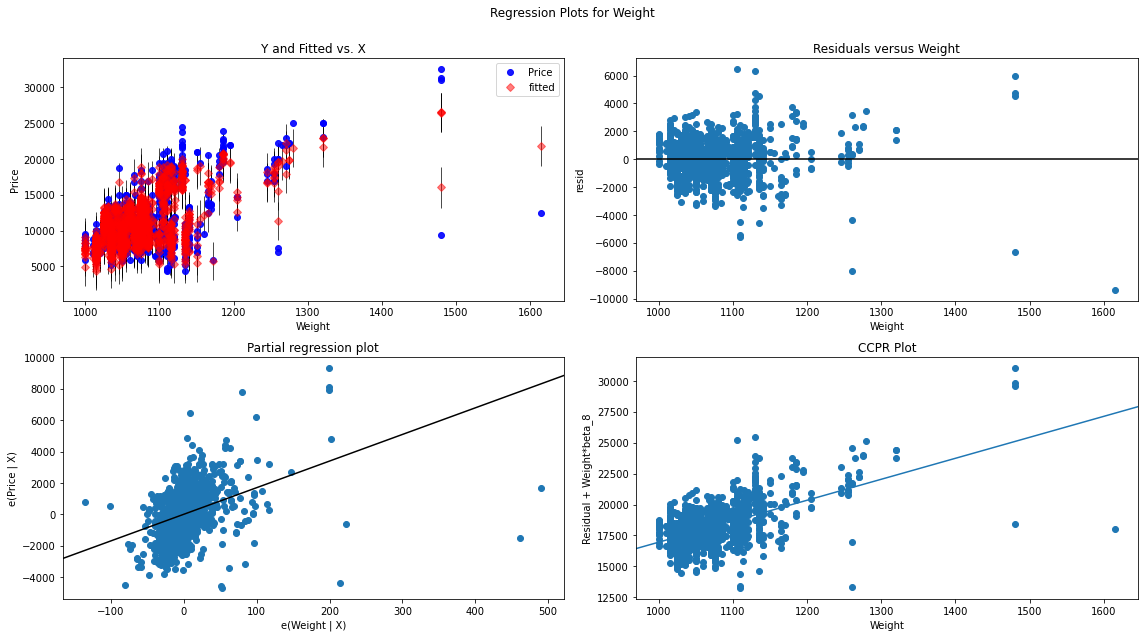

In [26]:
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

In [27]:
model_influence = model.get_influence()
(c,x) = model_influence.cooks_distance

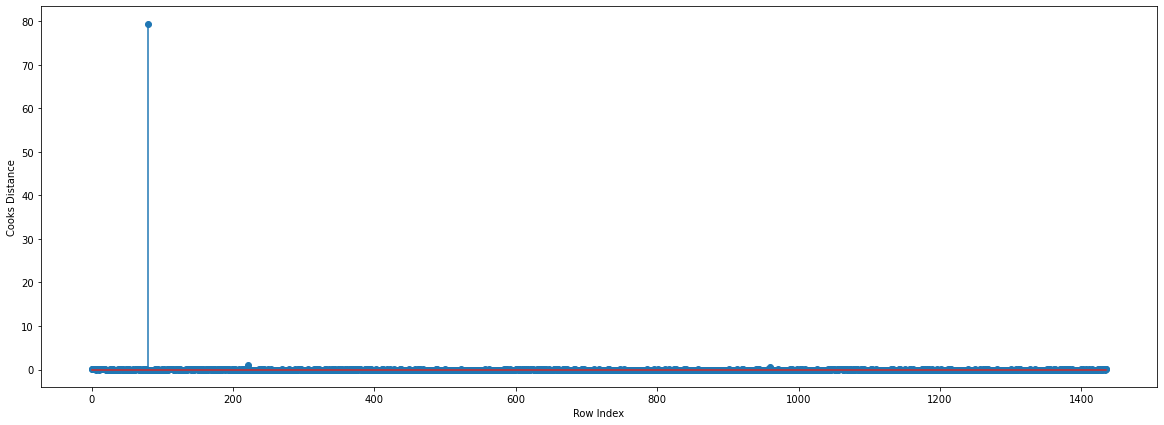

In [28]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

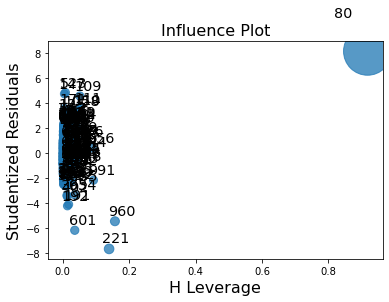

In [29]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [30]:
data_new = df.drop(df.index[[80]],axis=0).reset_index()
data_new = data_new.drop(['index'],axis=1)

In [31]:
model1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data_new).fit()

In [32]:
new_data = pd.DataFrame({'Age_08_04':26,'KM':48000,'HP':90,'cc':2000,'Doors':3,'Gears':5,'Quarterly_Tax':210,'Weight':1165},index=[1])
predictwt = model1.predict(new_data)

In [33]:
model1.params

Intercept       -6284.740060
Age_08_04        -120.455049
KM                 -0.017849
HP                 39.346295
cc                 -2.524177
Doors             -27.228488
Gears             523.941556
Quarterly_Tax       9.043968
Weight             20.165459
dtype: float64

In [34]:
predictwt

1    16149.527067
dtype: float64